<a href="https://colab.research.google.com/github/kavya19k/SCT_TrackCode_TaskNumber2/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

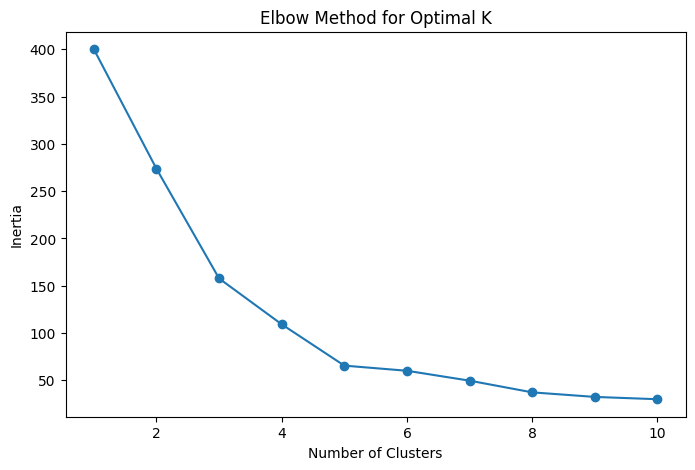

Cluster Assignments:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          2  
1          2  
2          2  
3     

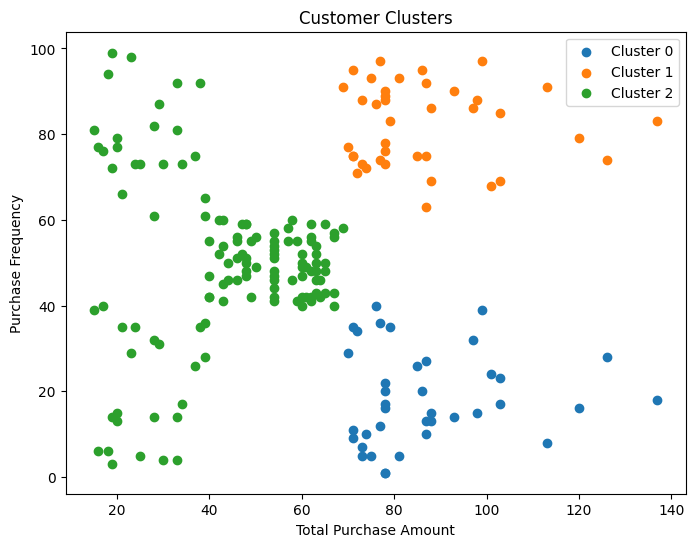

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample dataset (replace with your real data)
data =pd.read_csv("/content/Mall_Customers.csv")

# Load data into a DataFrame
df = pd.DataFrame(data)

# Features for clustering
X = df[["Annual Income (k$)","Spending Score (1-100)"]]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# From the elbow method, choose the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Display the cluster assignments
print("Cluster Assignments:")
print(df)

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = df[df["Cluster"] == cluster]
    plt.scatter(
        cluster_data["Annual Income (k$)"],
        cluster_data["Spending Score (1-100)"],
        label=f"Cluster {cluster}"
    )

plt.title("Customer Clusters")
plt.xlabel("Total Purchase Amount")
plt.ylabel("Purchase Frequency")
plt.legend()
plt.show()
